In [1]:
import netCDF4 as nc
import numpy as np
import pylab as plt
import xarray as xr
import glob

maindir = '/projects/awaken/j3lee/run_amrw/stable/s3_20180612-10m-p/'
stat_dir = 'post_processing'

lidar_dir = '/projects/awaken/j3lee/arm-data/sgpdlprofwstats4newsC1/'
lidar_file = 'sgpdlprofwstats4newsC1.c1.20180612.000000.custom.nc'

# in UTC
start_time = 3
# in hours
sim_duration = 6

In [2]:
# when using xarray multifile dataset, have to grab each group of the nc files individually
xtime = xr.open_mfdataset(maindir+stat_dir+'/abl_statistics*.nc', 
                          concat_dim=['num_time_steps'], combine='nested')

xprof = xr.open_mfdataset(maindir+stat_dir+'/abl_statistics*.nc', group='mean_profiles', 
                          concat_dim=['num_time_steps'], combine='nested')

# remove duplicated times
_, index = np.unique(xtime['time'], return_index=True)
xtime = xtime.isel(num_time_steps=index)
xprof = xprof.isel(num_time_steps=index)

nc_file_num = len(glob.glob1(maindir+stat_dir, 'abl_statistics*.nc'))

# the forcing file used for the simulation 
forcing = nc.Dataset(maindir+'forcing_20180612_raj.nc')
# print(forcing.variables.keys())

In [3]:
if nc_file_num == 1: 
    sim_height = xprof['h'].values
else: 
    sim_height = xprof['h'].values[0,:] 
print(sim_height.shape)
print(sim_height)
sim_time = np.round(xtime['time'].values)
print(sim_time.shape)
print(sim_time)

forcing_height = forcing['heights'][:]
forcing_time = forcing['times'][:]
n_fh = len(forcing_height)
n_ft = len(forcing_time)
# or n_fh = forcing.dimensions['nheight'].size

forcing_momu = np.reshape(forcing['wrf_momentum_u'][:], (n_ft, n_fh))
forcing_momv = np.reshape(forcing['wrf_momentum_v'][:], (n_ft, n_fh))
forcing_temp = np.reshape(forcing['wrf_temperature'][:], (n_ft, n_fh))

(100,)
[  5.  15.  25.  35.  45.  55.  65.  75.  85.  95. 105. 115. 125. 135.
 145. 155. 165. 175. 185. 195. 205. 215. 225. 235. 245. 255. 265. 275.
 285. 295. 305. 315. 325. 335. 345. 355. 365. 375. 385. 395. 405. 415.
 425. 435. 445. 455. 465. 475. 485. 495. 505. 515. 525. 535. 545. 555.
 565. 575. 585. 595. 605. 615. 625. 635. 645. 655. 665. 675. 685. 695.
 705. 715. 725. 735. 745. 755. 765. 775. 785. 795. 805. 815. 825. 835.
 845. 855. 865. 875. 885. 895. 905. 915. 925. 935. 945. 955. 965. 975.
 985. 995.]
(36,)
[  600.  1200.  1800.  2400.  3000.  3600.  4200.  4800.  5400.  6000.
  6600.  7200.  7800.  8400.  9000.  9600. 10200. 10800. 11400. 12000.
 12600. 13200. 13800. 14400. 15000. 15600. 16200. 16800. 17400. 18000.
 18600. 19200. 19800. 20400. 21000. 21600.]


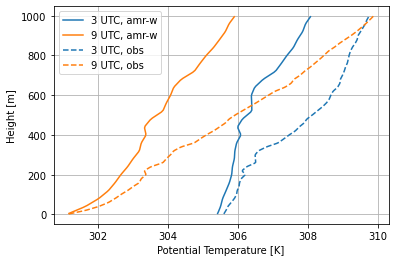

In [4]:
plt.plot(xprof['theta'].values[0,:], sim_height, 
         label=str(start_time)+' UTC, amr-w')
plt.plot(xprof['theta'].values[-1,:], sim_height, 
         label=str(start_time+sim_duration)+' UTC, amr-w')

plt.plot(forcing_temp[0,:], forcing_height, linestyle='dashed', color='C0', 
         label=str(start_time)+' UTC, obs')
plt.plot(forcing_temp[-1,:], forcing_height, linestyle='dashed', color='C1', 
         label=str(start_time+sim_duration)+' UTC, obs')
plt.xlabel('Potential Temperature [K]')
plt.ylabel('Height [m]')
plt.legend()
plt.grid(True)

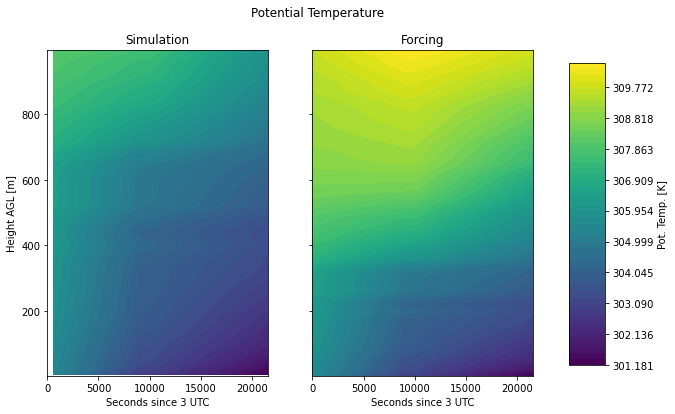

In [5]:
fig, ax = plt.subplots(figsize=(10,6),ncols=2,sharey=True,sharex=True)

contour_min = np.min([xprof['theta'].values.min(), forcing_temp.min()])
contour_max = np.max([xprof['theta'].values.max(), forcing_temp.max()])

im = ax[0].contourf(sim_time, sim_height, xprof['theta'].values.T, 
                    levels=np.linspace(contour_min, contour_max))
ax[1].contourf(forcing_time, forcing_height, forcing_temp.T, 
               levels=np.linspace(contour_min, contour_max))

plt.xlim(0, sim_time.max())
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(im, cax=cbar_ax, label='Pot. Temp. [K]')
plt.suptitle('Potential Temperature')

ax[0].set_xlabel('Seconds since '+str(start_time)+' UTC')
ax[1].set_xlabel('Seconds since '+str(start_time)+' UTC')
ax[0].set_ylabel('Height AGL [m]')

ax[0].set_title('Simulation')
ax[1].set_title('Forcing')

plt.show()

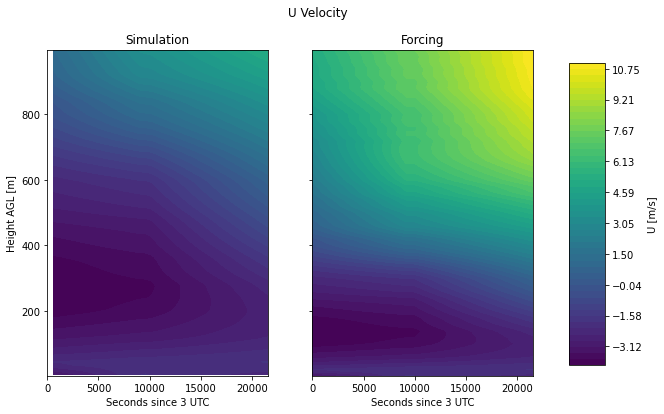

In [6]:
fig, ax = plt.subplots(figsize=(10,6),ncols=2,sharey=True,sharex=True)

contour_min = np.min([xprof['u'].values.min(), forcing_momu.min()])
contour_max = np.max([xprof['u'].values.max(), forcing_momu.max()])

im = ax[0].contourf(sim_time, sim_height, xprof['u'].values.T, 
                    levels=np.linspace(contour_min, contour_max))
ax[1].contourf(forcing_time, forcing_height, forcing_momu.T, 
               levels=np.linspace(contour_min, contour_max))

plt.xlim(0, sim_time.max())
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(im, cax=cbar_ax, label='U [m/s]')
plt.suptitle('U Velocity')

ax[0].set_xlabel('Seconds since '+str(start_time)+' UTC')
ax[1].set_xlabel('Seconds since '+str(start_time)+' UTC')
ax[0].set_ylabel('Height AGL [m]')

ax[0].set_title('Simulation')
ax[1].set_title('Forcing')

plt.show()

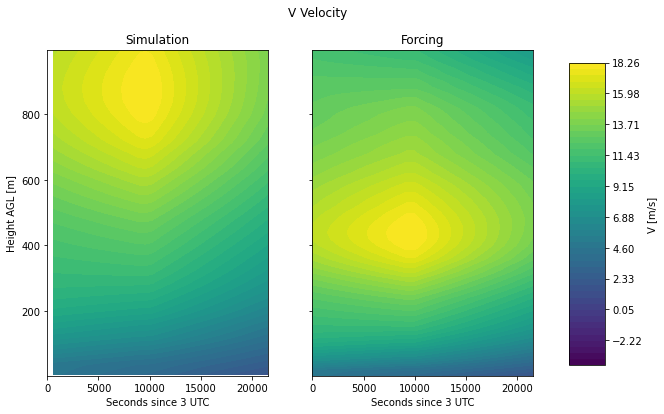

In [7]:
fig, ax = plt.subplots(figsize=(10,6),ncols=2,sharey=True,sharex=True)

contour_min = np.min([xprof['v'].values.min(), forcing_momu.min()])
contour_max = np.max([xprof['v'].values.max(), forcing_momu.max()])

im = ax[0].contourf(sim_time, sim_height, xprof['v'].values.T, 
                    levels=np.linspace(contour_min, contour_max))
ax[1].contourf(forcing_time, forcing_height, forcing_momv.T, 
               levels=np.linspace(contour_min, contour_max))

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(im, cax=cbar_ax, label='V [m/s]')
plt.suptitle('V Velocity')

ax[0].set_xlabel('Seconds since '+str(start_time)+' UTC')
ax[1].set_xlabel('Seconds since '+str(start_time)+' UTC')
ax[0].set_ylabel('Height AGL [m]')

ax[0].set_title('Simulation')
ax[1].set_title('Forcing')

plt.show()

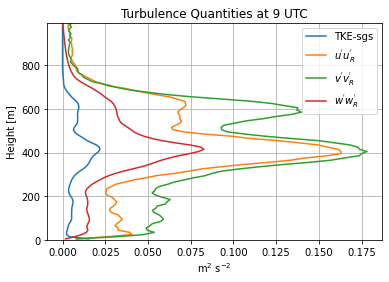

In [8]:
plt.plot(xprof['k_sgs'].values[-1,:], sim_height, 
         color='C0', label='TKE-sgs')
plt.plot(xprof['u\'u\'_r'][-1,:], sim_height, 
         color='C1', label=r"$u^{'}u^{'}_{R}$")
plt.plot(xprof['v\'v\'_r'][-1,:], sim_height, 
         color='C2',label=r"$v^{'}v^{'}_{R}$")
plt.plot(xprof['w\'w\'_r'][-1,:],sim_height, 
         color='C3',label=r"$w^{'}w^{'}_{R}$")
plt.ylim(0, sim_height.max())
# plt.xlim(-0.001,0.45)
plt.grid(True)
plt.title('Turbulence Quantities at '+str(start_time+sim_duration)+' UTC')
plt.ylabel('Height [m]')
plt.xlabel('m$^2$ s$^{-2}$')
plt.legend()
plt.show()

In [9]:
#wstat = nc.Dataset('/projects/awaken/ckaul/wrfForcing/20170628/225451/sgpdlprofwstats4newsC1.c1.20170629.000000.nc')
wstat = nc.Dataset(lidar_dir+lidar_file)
print(wstat.variables.keys())
wvar = wstat.variables['w_variance'][:,:]
snr = wstat.variables['snr'][:,:]
noise = wstat.variables['noise'][:,:]

wvar = np.ma.masked_where(snr < 0.008, wvar)
# wvar = np.ma.masked_where(noise > 1, wvar) --this masks almost everything, need to ask Rob about it

dict_keys(['base_time', 'time_offset', 'time', 'time_bounds', 'height', 'snr', 'snr_25', 'snr_75', 'w', 'w_25', 'w_75', 'noise', 'w_variance', 'w_skewness', 'w_kurtosis', 'dl_cbh', 'dl_cbh_25', 'dl_cbh_75', 'dl_cbh_zmax', 'dl_cloud_frequency', 'cbw', 'cbw_25', 'cbw_75', 'cbw_up_fraction', 'nshots', 'ngate_samples', 'averaging_time', 'snr_threshold', 'sample_frequency', 'wavelength', 'ceil_cbh', 'ceil_cbh_25', 'ceil_cbh_75', 'ceil_cbh_zmax', 'ceil_cloud_frequency', 'ceil_lat', 'ceil_lon', 'ceil_alt', 'ecor_temp', 'ecor_h2o', 'ecor_tke', 'ecor_ustar', 'ecor_w_var', 'ecor_w_skew', 'ecor_w_kurt', 'ecor_wt', 'ecor_wq', 'ecor_lat', 'ecor_lon', 'ecor_alt', 'met_spr_mean', 'met_spr_min', 'met_spr_max', 'met_lat', 'met_lon', 'met_alt', 'lat', 'lon', 'alt'])


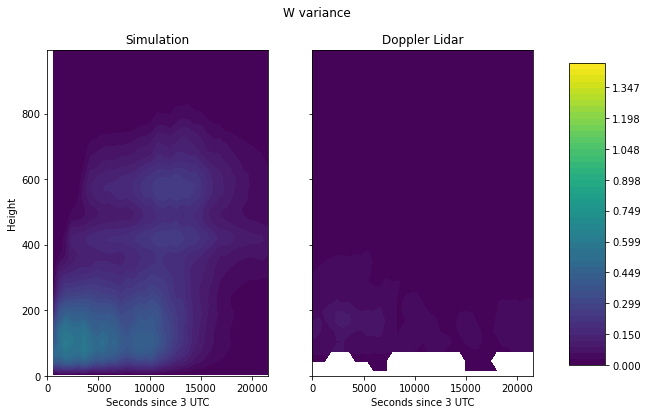

In [10]:
fig, ax = plt.subplots(figsize=(10,6),ncols=2,sharey=True,sharex=True)

contour_min = np.min([xprof['w\'w\'_r'].values.min(), wvar.min()])
contour_max = np.max([xprof['w\'w\'_r'].values.max(), wvar.max()])

im = ax[0].contourf(sim_time, sim_height, xprof['w\'w\'_r'][:,:].T, 
                    levels=np.linspace(contour_min ,contour_max))
ax[1].contourf(wstat.variables['time'][:]-start_time*3600, wstat.variables['height'][:], 
               wvar[:,:].T, levels=np.linspace(contour_min, contour_max))

plt.xlim(0, sim_time.max())
plt.ylim(0, sim_height.max())

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(im, cax=cbar_ax)
ax[0].set_ylabel('Height')
ax[0].set_xlabel('Seconds since '+str(start_time)+' UTC')
ax[1].set_xlabel('Seconds since '+str(start_time)+' UTC')
ax[0].set_title('Simulation')
ax[1].set_title('Doppler Lidar')
plt.suptitle('W variance')

plt.show()

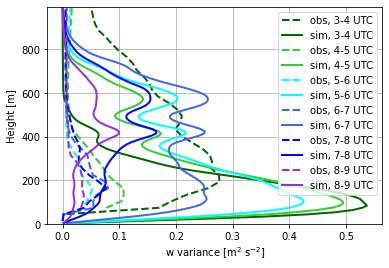

In [12]:
hour_interval_sec = (np.arange(sim_duration+1))*3600

line_c = ['darkgreen', 'limegreen', 'cyan', 'royalblue', 'blue', 'darkorchid']

for ind, val in enumerate(hour_interval_sec[:-1]):
    
    start_hr = str(start_time+ind)
    end_hr = str(start_time+ind+1)

    wstat_t = [i for i,v in enumerate(wstat.variables['time'][:])
               if v > val and v <= hour_interval_sec[ind+1]]
    
    plt.plot(np.ma.mean(wvar[min(wstat_t):max(wstat_t),:],axis=0), 
             wstat.variables['height'][:], c=line_c[ind],
             label='obs, '+start_hr+'-'+end_hr+' UTC', linewidth=2, linestyle='--')
    
    sim_t = [i for i,v in enumerate(sim_time)
             if v > val and v <= hour_interval_sec[ind+1]]
    
    plt.plot(np.mean(xprof['w\'w\'_r'][min(sim_t):max(sim_t),:],axis=0), 
             sim_height, c=line_c[ind], 
             label='sim, '+start_hr+'-'+end_hr+' UTC', linewidth=2)
    
plt.ylim(0, sim_height.max())
# plt.xlim(-0.001,4)
# plt.yticks(np.arange(200,2600,200))
plt.grid(True)
plt.legend()
plt.ylabel(r'Height [m]')
plt.xlabel(r'w variance [m$^2$ s$^{-2}$]')
plt.show()